##Capstone 2
### Telecom Churn Dataset (IBM Watson Analytics)
#### Customer churn, also known as customer attrition, customer turnover, or customer defection, is the loss of clients or customers. Telecom companies often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies often have customer service branches which attempt to win back churning clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

####Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another service provider. Involuntary churn occurs due to circumstances such as a customer's relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as  monthly contracts and how tech support or after-sales help is provided. Predictive analytics use prediction models that predict customer churn by assessing their likelihood of risk to churn.

#### Objective: The main objective of my project was to build predictive models using Supervised Learning methods to predict customers most vulnerable to churn.
####Approach: I will be using various learning models (Logistic regression, KNN classifier, SVM, Decision Tree, Random Forest, Gradient Boosting) and feature selection methods (Selectkbest, PCA) for Supervised Learning. Since these models generate a small prioritized list of potential churners, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import seaborn as sns
import math

sns.set_style("whitegrid")
warnings.filterwarnings("ignore")

####The Telecom Churn Dataset comes from the Kaggle.com. The goal is to predict whether the customer will churn. 

In [ ]:
df_churn= pd.read_excel('/content/drive/My Drive/WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [ ]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


#### Our raw data consisted of 7043 customers (observations) and 21 variables (features).

In [ ]:
df_churn.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [ ]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
# Replacing empty space with NaN
empty_cols=['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection','TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']
for i in empty_cols:
    df_churn[i]=df_churn[i].replace(" ", np.nan)

### Missing values

In [ ]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges         True
Churn               False
dtype: bool

In [ ]:
df_churn.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

####Total charges has 11 NaNs or missing values. So let's drop them. 

In [ ]:
df_churn=df_churn.dropna()

In [ ]:
df_churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
df_churn.isnull().any()

customerID          False
gender              False
SeniorCitizen       False
Partner             False
Dependents          False
tenure              False
PhoneService        False
MultipleLines       False
InternetService     False
OnlineSecurity      False
OnlineBackup        False
DeviceProtection    False
TechSupport         False
StreamingTV         False
StreamingMovies     False
Contract            False
PaperlessBilling    False
PaymentMethod       False
MonthlyCharges      False
TotalCharges        False
Churn               False
dtype: bool

####I cleaned the dataset to remove the missing variables. There are not many missing values. It was a clean dataset. Let's move on to data exploration & visualization. 

###Data Exploration and Visualization

####The “Churn” column was my target variable.The classification goal was to predict whether the customer will churn(1/0).
#### I will perform for hot encoding categorical variables. I will explore the correlation between several features and the target variable.I will use a correlation matrix to explore if there is any correlation between different features.I will then perform feature engineering to better predict the target variable (Churn).

In [ ]:
# As a pre-preparation strip whitespace in column titles (if any)
titles = {k:k.replace(k,k.strip()) for k in df_churn.columns}
df_churn.rename(columns=titles,inplace=True)

In [ ]:
# Drop the customerID
df_churn.drop('customerID',axis=1,inplace=True)

In [ ]:
#Replace values in columns with binary numeric variable 

binary_cols=['Partner','Dependents','PhoneService','PaperlessBilling']

for i in binary_cols:
    df_churn[i]=df_churn[i].replace({"Yes":1,"No":0})

#Encoding column 'gender'
df_churn['gender']=df_churn['gender'].replace({"Male":1,"Female":0})

In [ ]:
# Converting other categorical variables into dummy variables
category_cols=['PaymentMethod','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract']

for cc in category_cols:
    dummies = pd.get_dummies(df_churn[cc], drop_first=False)
    dummies = dummies.add_prefix("{}#".format(cc))
    df_churn.drop(cc, axis=1, inplace=True)
    df_churn = df_churn.join(dummies)

In [ ]:
#Convert the Target variable Churn into a binary numeric variable
df_churn['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df_churn['Churn'].replace(to_replace='No',  value=0, inplace=True)

In [ ]:
df_churn.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'PaymentMethod#Bank transfer (automatic)',
       'PaymentMethod#Credit card (automatic)',
       'PaymentMethod#Electronic check', 'PaymentMethod#Mailed check',
       'MultipleLines#No', 'MultipleLines#No phone service',
       'MultipleLines#Yes', 'InternetService#DSL',
       'InternetService#Fiber optic', 'InternetService#No',
       'OnlineSecurity#No', 'OnlineSecurity#No internet service',
       'OnlineSecurity#Yes', 'OnlineBackup#No',
       'OnlineBackup#No internet service', 'OnlineBackup#Yes',
       'DeviceProtection#No', 'DeviceProtection#No internet service',
       'DeviceProtection#Yes', 'TechSupport#No',
       'TechSupport#No internet service', 'TechSupport#Yes', 'StreamingTV#No',
       'StreamingTV#No internet service', 'StreamingTV#Yes',
       'StreamingMovies#No', 'StreamingMovies#No internet service',


In [ ]:
df_churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,PaymentMethod#Bank transfer (automatic),PaymentMethod#Credit card (automatic),PaymentMethod#Electronic check,PaymentMethod#Mailed check,MultipleLines#No,MultipleLines#No phone service,MultipleLines#Yes,InternetService#DSL,InternetService#Fiber optic,InternetService#No,OnlineSecurity#No,OnlineSecurity#No internet service,OnlineSecurity#Yes,OnlineBackup#No,OnlineBackup#No internet service,OnlineBackup#Yes,DeviceProtection#No,DeviceProtection#No internet service,DeviceProtection#Yes,TechSupport#No,TechSupport#No internet service,TechSupport#Yes,StreamingTV#No,StreamingTV#No internet service,StreamingTV#Yes,StreamingMovies#No,StreamingMovies#No internet service,StreamingMovies#Yes,Contract#Month-to-month,Contract#One year,Contract#Two year
0,0,0,1,0,1,0,1,29.85,29.85,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
1,1,0,0,0,34,1,0,56.95,1889.50,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,0,0,2,1,1,53.85,108.15,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0
3,1,0,0,0,45,0,0,42.30,1840.75,0,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0
4,0,0,0,0,2,1,1,70.70,151.65,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0


#### Correlation Matrices and Heat maps

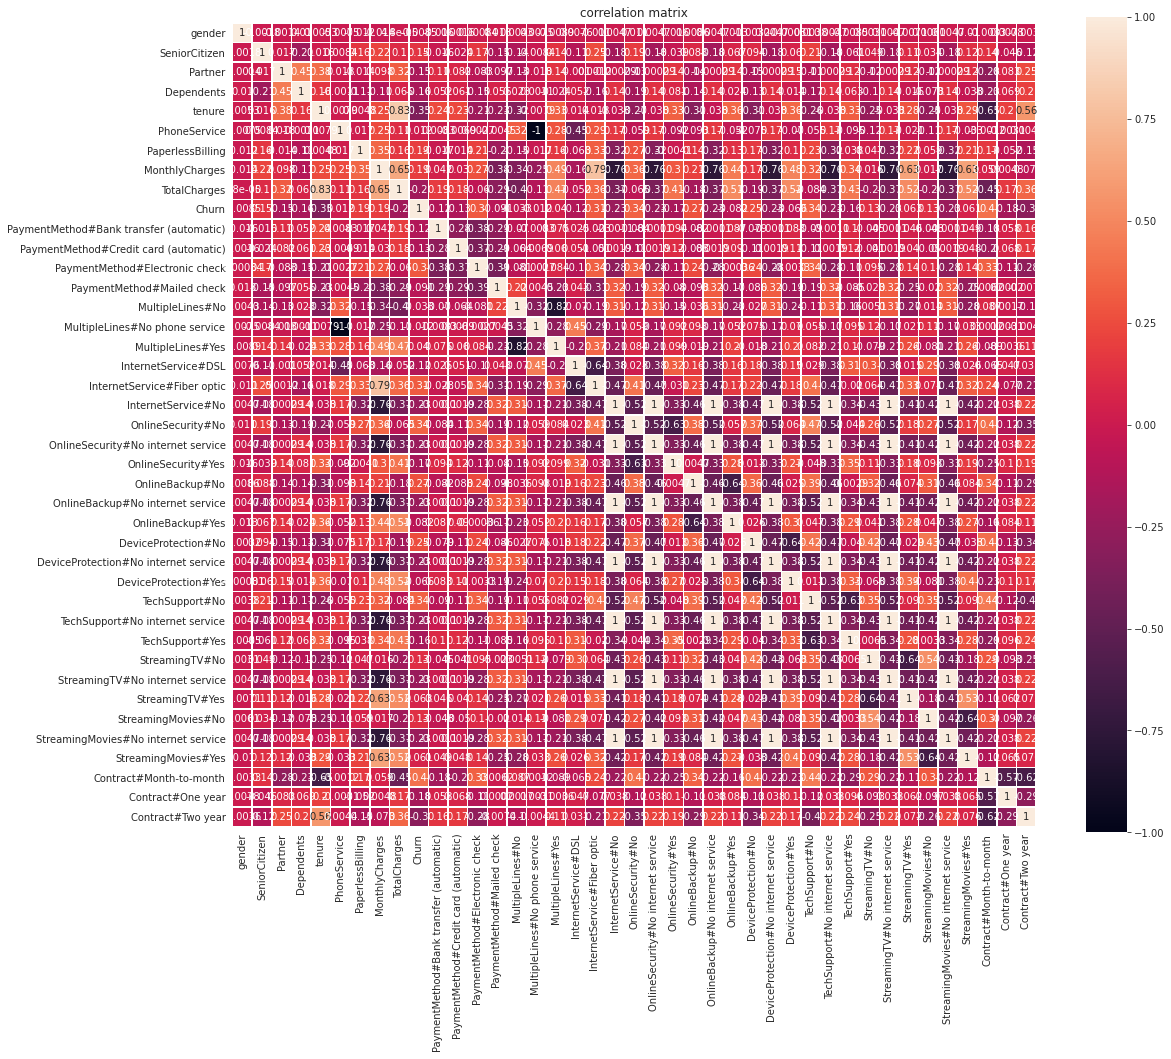

In [ ]:
# make the correlation matrices.
corrmat = df_churn.corr()

# heatmaps are a great way to get 
# a quick visual read on a big correlation matrix.

plt.figure(figsize=(18,15))

plt.plot(1,1)
# draw the heatmap using seaborn.
sns.heatmap(corrmat, square=True, annot=True, linewidths=.5)
plt.title("correlation matrix")

plt.show()

In [ ]:
#Get Correlation of "Churn" with other variables:
df_churn.corr()['Churn'].sort_values(ascending = False)

Churn                                      1.000000
Contract#Month-to-month                    0.404565
OnlineSecurity#No                          0.342235
TechSupport#No                             0.336877
InternetService#Fiber optic                0.307463
PaymentMethod#Electronic check             0.301455
OnlineBackup#No                            0.267595
DeviceProtection#No                        0.252056
MonthlyCharges                             0.192858
PaperlessBilling                           0.191454
SeniorCitizen                              0.150541
StreamingMovies#No                         0.130920
StreamingTV#No                             0.128435
StreamingTV#Yes                            0.063254
StreamingMovies#Yes                        0.060860
MultipleLines#Yes                          0.040033
PhoneService                               0.011691
gender                                    -0.008545
MultipleLines#No phone service            -0.011691
MultipleLine

####Bar Plots

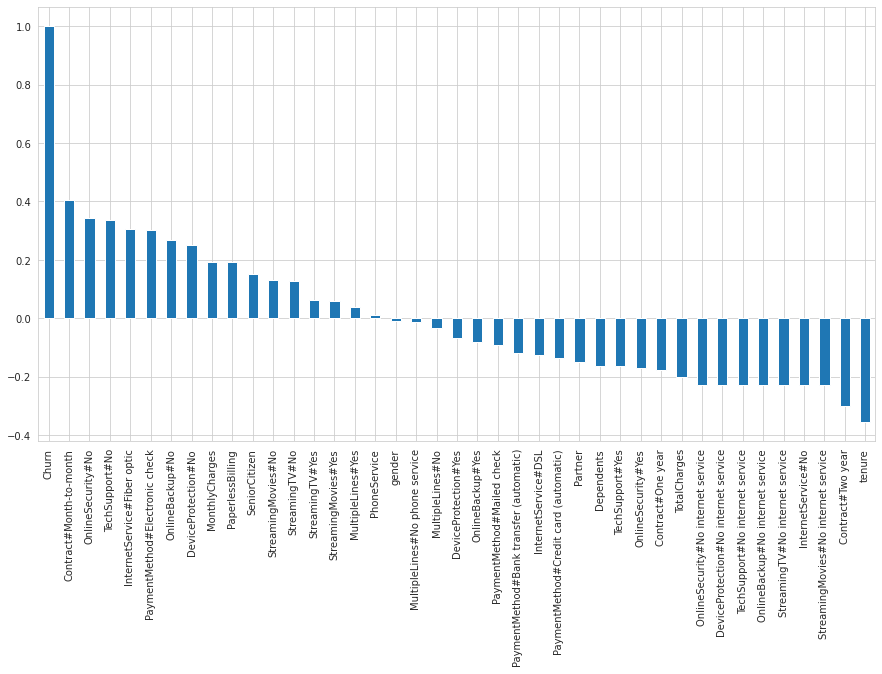

In [ ]:
plt.figure(figsize=(15,8))
df_churn.corr()['Churn'].sort_values(ascending = False).plot(kind='bar') 

#### Month-to-month contracts, No Online Security, No Tech Support, Fiber Optic Internet service and Electronic Check Payment method seem to be positively correlated with Churn. While, Tenure, Two Year Contracts, No Internet Service  seem to be negatively correlated with churn.

####Interestingly, services such as Online security, Streaming TV, Online backup, Tech support, Device Protection, Streaming Movies, etc. without internet connection seem to be negatively correlated to churn.

####We will explore the patterns for the above correlations before we delve into data modelling and identifying the important features (variables).

#### Target variable (y): — has the customer churned? (binary: “1”, means “Yes”, “0” means “No)
#### Check for class imbalance in Target variable. 

In [ ]:
No_churn = (df_churn['Churn'] == 0).sum()
print("Number of customers who didn't churn:",No_churn)
Yes_churn = (df_churn['Churn']==1).sum()
print("Number of customers who churned:",Yes_churn)
Percentage_No_churn = No_churn/(No_churn+Yes_churn)
print("Percentage of customers who didn't churn:", Percentage_No_churn*100)
Percentage_Yes_churn = Yes_churn/(No_churn+Yes_churn)
print("Percentage of customers who churned:", Percentage_Yes_churn*100)

Number of customers who didn't churn: 5163
Number of customers who churned: 1869
Percentage of customers who didn't churn: 73.42150170648463
Percentage of customers who churned: 26.578498293515356


### Feature Engineering using SelectKbest method

#### Since my target variable was unbalanced. So I will balance the target variable with SMOTE (Synthetic Minority Oversampling Technique) and then perform feature engineering using SelectKbest method to reduce number of features for Supervised Learning models. 

#### The SelectKbest technique helps to choose those features in our data that contribute most to the target variable. In other words we choose the best predictors for the target variable. The method will select features according to the k highest scores. Function taking two arrays X and y, and returning a pair of arrays (scores, pvalues) or a single array with scores. f_classif used only for categorical targets and based on the Analysis of Variance (ANOVA) statistical test.

####As our target variable is unbalanced, we will balance the variable with SMOTE (Synthetic Minority Oversampling Technique). As its name suggests, SMOTE is an oversampling method. It works by creating synthetic samples from the minority class (Yes-Churn) instead of creating copies. The method Randomly picks a point from the minority class. Computes the k-nearest neighbors (for some pre-specified k) for this point. Adds k new points somewhere between the chosen point and each of its neighbors.


In [ ]:
# Import necessary packages.
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
# Import selectkbest and f_classif for our classification task.
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler

In [ ]:
# Create our target variable y. We will change boolean series to binary by changing data type to integer.
y = df_churn['Churn']

# Create X values by dropping our target.
X = df_churn.drop(columns=['Churn'])

# Use pandas get_dummies function to create dummy variables necessary for statistical interpretation (One-Hot Encoding).
X = pd.get_dummies(X)

# Run our SelectKbest selector using f_classif for our classification task.
selector = SelectKBest(f_classif, k=20).fit(X, y)

# Create boolean values to select features from original feature set using get_support.
boolean = selector.get_support()

# Our new X variable now consists of our selected best features based on K value or K highest scores.
X_res = X[X.columns[boolean]]

# Now let's do class balancing using SMOTE.
sm = SMOTE(sampling_strategy='minority', random_state=40, k_neighbors=5)

X_res, y = sm.fit_resample(X_res, y)

# Scale
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X_res)

# Let's split our data this time using our newly selected features.
X_train, X_test, y_train, y_test = train_test_split(X_res, y, test_size=0.2, random_state=40)

####Check shape of newly created features X and target variable y (from SelectKbest and SMOTE approach)

In [ ]:
X.shape

(7032, 40)

In [ ]:
X_res.shape

(10326, 20)

In [ ]:
print('After SelectKbest and OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After SelectKbest and OverSampling, the shape of train_y: {} \n'.format(y.shape))

After SelectKbest and OverSampling, the shape of train_X: (10326, 20)
After SelectKbest and OverSampling, the shape of train_y: (10326,) 



#### Also, let's check the counts of target variable y 

In [ ]:
print("After SelectKbest and OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After SelectKbest and OverSampling, counts of label '0': {}".format(sum(y==0)))

After SelectKbest and OverSampling, counts of label '1': 5163
After SelectKbest and OverSampling, counts of label '0': 5163


####Now we have a perfectly balanced data. Let's apply Supervised Learning models. 

###Supervised Learning

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

#### We will use gridsearchCV to select the best hyperparameters for each model

####KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define the hyperparameter values that should be searched
k_range = list(range(1, 100))
weights_options = ['uniform', 'distance']

# Create a hyperparameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weights_options)

# Initialize the grid: apply cross validation
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy' )

#Fit the grid
grid.fit(X_train, y_train)

# Examine the best-fit model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7822033898305085
{'n_neighbors': 9, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='distance')


In [ ]:
# Now let's train our balanced model using all data and the best known hyperparameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=9, weights='distance')
%timeit knn.fit(X_train, y_train)
%timeit print(knn.score(X_train,y_train))

10 loops, best of 3: 21.6 ms per loop
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
0.9969733656174334
10 loops, best of 3: 77.3 ms per loop


##### Training the KNN model took 21.5 milliseconds on average

In [ ]:
# Make a prediction on test data
y_pred_knn=knn.predict(X_test)

#####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[746 310]
 [157 853]]


#####Confusion matrix (nice plot)

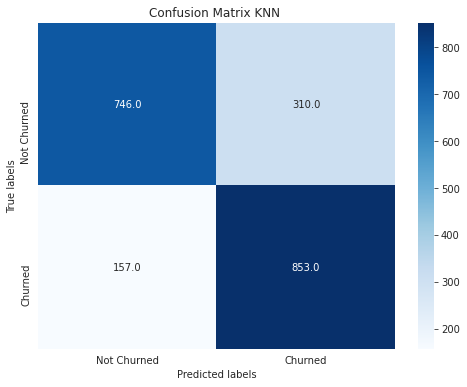

In [ ]:
import seaborn as sns
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN ');

#####Classification_Report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.83      0.71      0.76      1056
           1       0.73      0.84      0.79      1010

    accuracy                           0.77      2066
   macro avg       0.78      0.78      0.77      2066
weighted avg       0.78      0.77      0.77      2066



#### Logistic Regression model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-3,6, 12)
param_grid = {'C': c_space}
penalty = ['l1', 'l2']

# Initialize a logistic regression classifier: lr
lr = LogisticRegression()

# Initialize the GridSearchCV object: logreg_cv
lr_cv = GridSearchCV(lr, param_grid, cv=10)

# Best fit it to the data
best_model = lr_cv.fit(X_train, y_train)

# Examine the best model
print(best_model.best_score_)
print(best_model.best_params_)
print(best_model.best_estimator_)

0.7679176755447942
{'C': 0.2848035868435802}
LogisticRegression(C=0.2848035868435802, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Fitting Logistic regression model with best parameters
lr = LogisticRegression(C=0.77)
%timeit lr.fit(X_train, y_train)
%timeit print(lr.score(X_train,y_train))

10 loops, best of 3: 173 ms per loop
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.7676755447941889
0.76767554479

##### Training the Logistic Regression model took 171 milliseconds on average

In [ ]:
y_pred_lr = lr.predict(X_test)

#####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_lr)

[[764 292]
 [193 817]]


#####Confusion matrix (nice plot)

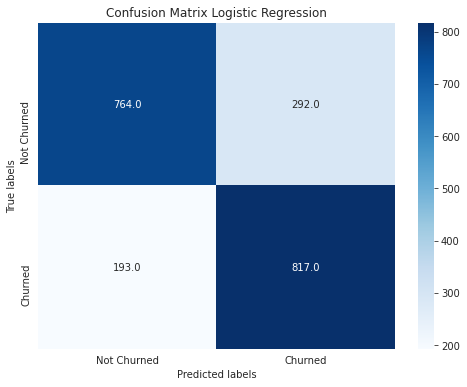

In [ ]:
import seaborn as sns
labels = ['Not Churned', 'Churned']

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_lr,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic Regression');

#####Classification_report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1056
           1       0.74      0.81      0.77      1010

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.76      2066



####Decision Tree model

In [ ]:
# Using grid search to find the best hyper parameters

param_grid = { 
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [3,6,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()

decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
%timeit decision_tree.fit(X_train, y_train)
%timeit print(decision_tree.score(X_train,y_train))

1 loop, best of 3: 2.31 s per loop
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917676
0.8167070217917

##### Training the decision tree model took 2.33 seconds on average

In [ ]:
# Print cross-validation score.
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.81113801, 0.80750605, 0.82324455, 0.82082324, 0.8062954 ,
       0.80145278, 0.80992736, 0.80508475, 0.83535109, 0.8062954 ])

In [ ]:
y_pred_tree = decision_tree.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_tree)

[[810 246]
 [154 856]]


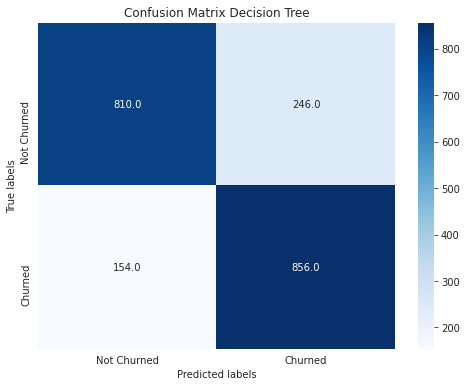

In [ ]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_tree,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Decision Tree');

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      1056
           1       0.78      0.85      0.81      1010

    accuracy                           0.81      2066
   macro avg       0.81      0.81      0.81      2066
weighted avg       0.81      0.81      0.81      2066



####Random Forest model

In [ ]:
# Using grid search to find the best hyper parameters

param_grid = { 
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=40)

rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=40,
                                  

In [ ]:
rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 150}

In [ ]:
#Fitting Random Forest model with best parameters
rfc_best=RandomForestClassifier(random_state=40, max_features='auto', n_estimators= 150, max_depth=10, criterion='entropy')
%timeit rfc_best.fit(X_train, y_train)
%timeit print(rfc_best.score(X_train,y_train))

1 loop, best of 3: 1.45 s per loop
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
0.8814769975786925
10 loops, best of 3: 148 ms per loop


##### Training the Random Forest model model took 1.44 seconds on average. There is significant time difference compared to other models.

In [ ]:
y_pred_rfc=rfc_best.predict(X_test)

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_rfc)

[[876 180]
 [127 883]]


####Confusion matrix (nice plot)

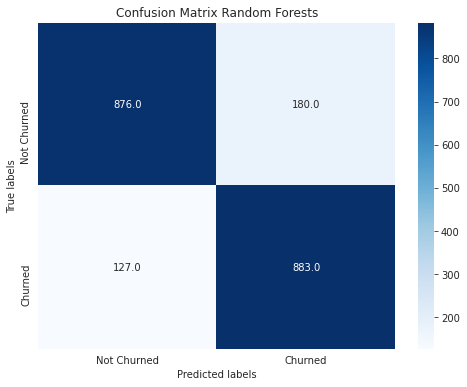

In [ ]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_rfc,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests');

####Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1056
           1       0.83      0.87      0.85      1010

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



###SVM Models

#####rbf Kernel

In [ ]:
# Finding best parameters for rbf kernel.
from sklearn.model_selection import GridSearchCV
from sklearn import svm

In [ ]:
from sklearn import svm

svm_rbf = svm.SVC(kernel='rbf')
%timeit svm_rbf.fit(X_train,y_train)
%timeit print(svm_rbf.score(X_train,y_train))

1 loop, best of 3: 4.26 s per loop
0.661138014527845
0.661138014527845
0.661138014527845
0.661138014527845
1 loop, best of 3: 2.57 s per loop


#####SVM Model doesn't seem like a good model for our dataset

In [ ]:
# predict out of sample
y_pred_rbf = svm_rbf.predict(X_test)

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
svm_rbf=confusion_matrix(y_test,y_pred_rbf)
print(svm_rbf)

[[753 303]
 [386 624]]


####Confusion matrix (nice plot)

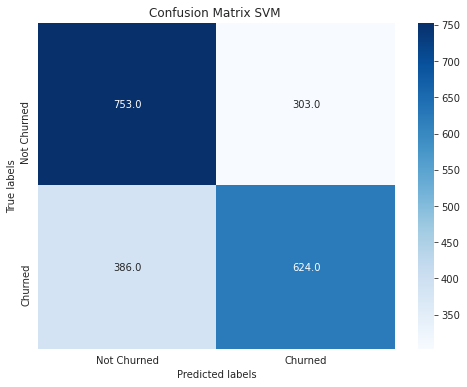

In [ ]:
import seaborn as sns

labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(svm_rbf,cmap="Blues", annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix SVM ');

####Classification report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rbf))

              precision    recall  f1-score   support

           0       0.66      0.71      0.69      1056
           1       0.67      0.62      0.64      1010

    accuracy                           0.67      2066
   macro avg       0.67      0.67      0.67      2066
weighted avg       0.67      0.67      0.67      2066



####Gradient Boosting Model

In [ ]:
param_grid = {'learning_rate': [0.1, 0.2, 0.3],
          'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
          'max_depth': [2,4,6,8,10],
          'loss': ['deviance', 'exponential']}

In [ ]:
from sklearn import ensemble
gbm=ensemble.GradientBoostingClassifier(random_state=40)

gbm = GridSearchCV(estimator=gbm, param_grid=param_grid, cv= 5)
gbm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
gbm.best_params_

{'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 4, 'n_estimators': 100}

In [ ]:
#Fitting Gradient Boosting model with best parameters
from sklearn import ensemble
gbm_best=ensemble.GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators= 100, max_depth=4, loss='deviance')
%timeit gbm_best.fit(X_train, y_train)
%timeit print(gbm_best.score(X_train,y_train))

1 loop, best of 3: 1.84 s per loop
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
0.8788135593220339
10 loops, best of 3: 21.8 ms per loop


##### Training the Gradient Boosting model took 1.85 seconds on average. This took even longer than Random Forest model. 

In [ ]:
y_pred_gbm=gbm_best.predict(X_test)

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print(confusion_matrix_gbm)

[[888 168]
 [138 872]]


####Confusion matrix (nice plot)

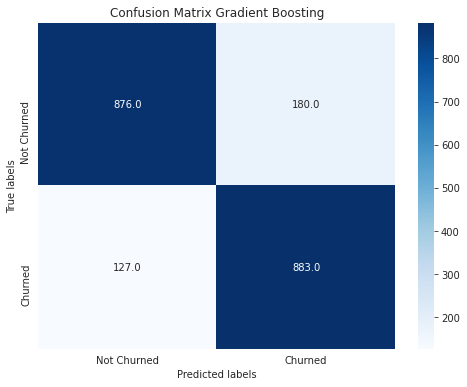

In [ ]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_rfc,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Gradient Boosting');

####Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.87      0.84      0.85      1056
           1       0.84      0.86      0.85      1010

    accuracy                           0.85      2066
   macro avg       0.85      0.85      0.85      2066
weighted avg       0.85      0.85      0.85      2066



####ROC curves of all models

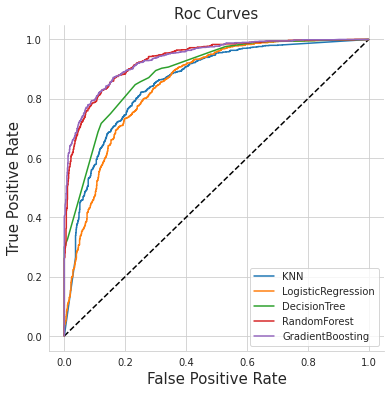

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine

knn_score = knn.predict_proba(X_test)[:,1]
lr_score = lr.predict_proba(X_test)[:,1]
decision_tree_score = decision_tree.predict_proba(X_test)[:,1]
rfc_score = rfc_best.predict_proba(X_test)[:,1]
gbm_score = gbm_best.predict_proba(X_test)[:,1]
#svm_score = svm_rbf.predict_proba(X_test)[:,1]

knn_fpr, knn_tpr,_ = roc_curve(y_test, knn_score)
lr_fpr, lr_tpr,_ = roc_curve(y_test, lr_score)
decision_tree_fpr, decision_tree_tpr,_ = roc_curve(y_test, decision_tree_score)
rfc_fpr, rfc_tpr,_ = roc_curve(y_test, rfc_score)
gbm_fpr, gbm_tpr,_ = roc_curve(y_test, gbm_score)
#svm_fpr, svm_tpr,_ = roc_curve(ytest, svm_score)

plt.figure(figsize = (6,6))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')

plt.plot(knn_fpr,knn_tpr, label = 'KNN')
plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(decision_tree_fpr, decision_tree_tpr, label = 'DecisionTree')
plt.plot(rfc_fpr,rfc_tpr, label = 'RandomForest')
plt.plot(gbm_fpr,gbm_tpr, label = 'GradientBoosting')
#plt.plot(svm_fpr,svm_tpr, label = 'SVM-rbf')

plt.legend()
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize = '15')
plt.ylabel('True Positive Rate', fontsize = '15')
plt.title('Roc Curves', fontsize = '15')
despine()

plt.savefig('RocCurve')

####Based on comparison of ROC curves for all the models (From SelectKbest method), Gradient Boosting and Random Forest perform much better compared to other models on the test data. 

###Feature Engineering using PCA method

####We will now use PCA method for feature extraction and dimensionality reduction for our Supervised Learning models. Also, balance the target variable using SMOTE as earlier.
####Principal Component Analysis, or PCA, is a dimensionality-reduction method that is used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set.It does so by creating new uncorrelated variables that successively maximize variance.

In [ ]:
# Import necessary packages.
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Create our target variable. We will change boolean series to binary by changing data type to integer.
y = df_churn['Churn']

# Create X values by dropping our target.
X = df_churn.drop(columns=['Churn'])

# Use pandas get_dummies function to create dummy variables necessary for statistical interpretation (One-Hot Encoding).
X = pd.get_dummies(X)

# Now let's do class balancing using SMOTE.
sm = SMOTE(sampling_strategy='minority', random_state=40, k_neighbors=5)

X, y = sm.fit_resample(X, y)

# First we must scale our data so that it can be fit into our PCA model.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Apply PCA to our scaled data to account for the variance in our dataset.
sklearn_pca = PCA(n_components = 3)
X_pca = sklearn_pca.fit_transform(scaled_data)

# Let's split our data now using our newly selected features.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.20, random_state=40)

####Check shape of newly created features X and target variable y (from PCA and SMOTE approach)

In [ ]:
X.shape

(10326, 40)

In [ ]:
X_pca.shape

(10326, 3)

In [ ]:
print('After PCA and OverSampling, the shape of train_X: {}'.format(X_pca.shape))
print('After PCA and OverSampling, the shape of train_y: {} \n'.format(y.shape))

After PCA and OverSampling, the shape of train_X: (10326, 3)
After PCA and OverSampling, the shape of train_y: (10326,) 



####Also, let's check the counts of target variable y

In [ ]:
print("After SelectKbest and OverSampling, counts of label '1': {}".format(sum(y==1)))
print("After SelectKbest and OverSampling, counts of label '0': {}".format(sum(y==0)))

After SelectKbest and OverSampling, counts of label '1': 5163
After SelectKbest and OverSampling, counts of label '0': 5163


####Now we have a perfectly balanced data. Let's apply Supervised Learning models.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import ensemble
from sklearn.model_selection import GridSearchCV

####KNN Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# define the hyperparameter values that should be searched
k_range = list(range(1, 100))
weights_options = ['uniform', 'distance']

# Create a hyperparameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=k_range, weights=weights_options)

# Initialize the grid: apply cross validation
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy' )

#Fit the grid
grid.fit(X_train, y_train)

# Examine the best-fit model
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_estimator_)

0.7767554479418886
{'n_neighbors': 85, 'weights': 'distance'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=85, p=2,
                     weights='distance')


In [ ]:
# Now let's train our balanced model using all data and the best known hyperparameters
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn = KNeighborsClassifier(n_neighbors=85, weights='distance')
%timeit knn.fit(X_train, y_train)
%timeit print(knn.score(X_train,y_train))

100 loops, best of 3: 4.62 ms per loop
0.9986682808716707
0.9986682808716707
0.9986682808716707
0.9986682808716707
1 loop, best of 3: 204 ms per loop


#####Training the KNN model took 4.62 milliseconds on average.

In [ ]:
# Make a prediction on test data
y_pred_knn=knn.predict(X_test)

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix
cm_knn=confusion_matrix(y_test, y_pred_knn)
print(cm_knn)

[[775 281]
 [186 824]]


#### Confusion matrix (nice plot)

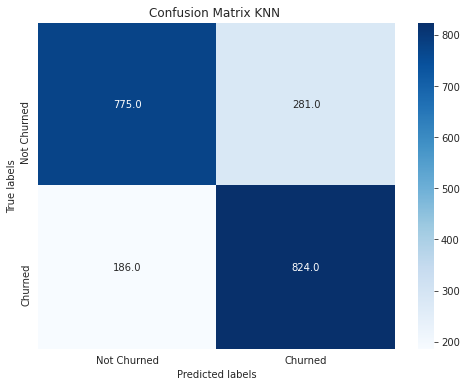

In [ ]:
import seaborn as sns
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(cm_knn,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix KNN ');

####Classification report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1056
           1       0.75      0.82      0.78      1010

    accuracy                           0.77      2066
   macro avg       0.78      0.77      0.77      2066
weighted avg       0.78      0.77      0.77      2066



#### Logistic Regression Model

In [ ]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-3,6, 12)
param_grid = {'C': c_space}
penalty = ['l1', 'l2']

# Initialize a logistic regression classifier: lr
lr = LogisticRegression()

# Initialize the GridSearchCV object: logreg_cv
lr_cv = GridSearchCV(lr, param_grid, cv=10)

# Best fit it to the data
best_model = lr_cv.fit(X_train, y_train)

# Examine the best model
print(best_model.best_score_)
print(best_model.best_params_)
print(best_model.best_estimator_)

0.7548426150121064
{'C': 0.04328761281083059}
LogisticRegression(C=0.04328761281083059, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
# Fitting Logistic regression model with best parameters
lr = LogisticRegression(C=0.75)
%timeit lr.fit(X_train, y_train)
%timeit print(lr.score(X_train,y_train))

100 loops, best of 3: 18.9 ms per loop
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.7546004842615012
0.754600484

#####Training the Logistic Regression model took 18.9 milliseconds on average.

In [ ]:
y_pred_lr = lr.predict(X_test)

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(confusion_matrix_lr)

[[752 304]
 [223 787]]


#### Confusion matrix (nice plot)

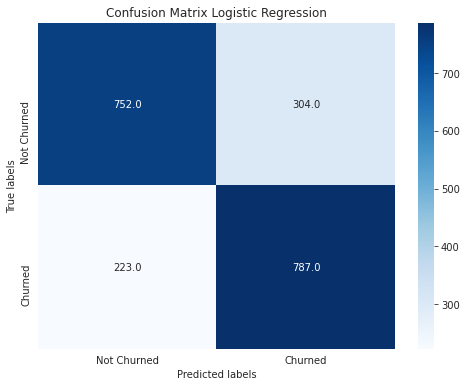

In [ ]:
import seaborn as sns
labels = ['Not Churned', 'Churned']

plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_lr,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Logistic Regression');

#### Classification report

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

           0       0.77      0.71      0.74      1056
           1       0.72      0.78      0.75      1010

    accuracy                           0.74      2066
   macro avg       0.75      0.75      0.74      2066
weighted avg       0.75      0.74      0.74      2066



####Decision Tree Model

In [ ]:
# Using grid search to find the best hyper parameters

param_grid = { 
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [3,6,10],
    'criterion' :['gini', 'entropy']
}

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

decision_tree = tree.DecisionTreeClassifier()

decision_tree = GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=5)
%timeit decision_tree.fit(X_train, y_train)
%timeit print(decision_tree.score(X_train,y_train))

1 loop, best of 3: 1.94 s per loop
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876513
0.7750605326876

#####Training the Decision Tree model took 1.94 seconds on average.

In [ ]:
# Print cross-validation score.
from sklearn.model_selection import cross_val_score
cross_val_score(decision_tree, X_train, y_train, cv=10)

array([0.74939467, 0.75544794, 0.75060533, 0.78329298, 0.75060533,
       0.74939467, 0.77118644, 0.76150121, 0.7748184 , 0.74213075])

In [ ]:
y_pred_tree = decision_tree.predict(X_test)

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(confusion_matrix_tree)

[[743 313]
 [176 834]]


####Confusion matrix (nice plot)

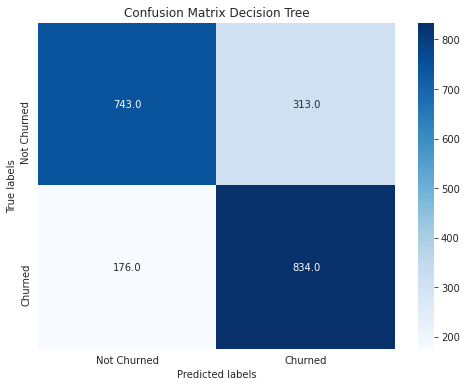

In [ ]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_tree,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Decision Tree');

####Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.81      0.70      0.75      1056
           1       0.73      0.83      0.77      1010

    accuracy                           0.76      2066
   macro avg       0.77      0.76      0.76      2066
weighted avg       0.77      0.76      0.76      2066



####Random Forest Model

In [ ]:
# Using grid search to find the best hyper parameters

param_grid = { 
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [2,4,6,8,10],
    'criterion' :['gini', 'entropy']}

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(random_state=40)

rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
rfc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=40,
                                  

In [ ]:
rfc.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'n_estimators': 400}

In [ ]:
#Fitting Random Forest model with best parameters
rfc_best=RandomForestClassifier(random_state=40, max_features='auto', n_estimators= 400, max_depth=10, criterion='gini')
%timeit rfc_best.fit(X_train, y_train)
%timeit print(rfc_best.score(X_train,y_train))

1 loop, best of 3: 3.3 s per loop
0.85
0.85
0.85
0.85
1 loop, best of 3: 411 ms per loop


##### Training the Random Forest model took 3.3 seconds on average.

In [ ]:
y_pred_rfc=rfc_best.predict(X_test)

#### Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_rfc = confusion_matrix(y_test, y_pred_rfc)
print(confusion_matrix_rfc)

[[772 284]
 [182 828]]


####Confusion matrix (nice plot)

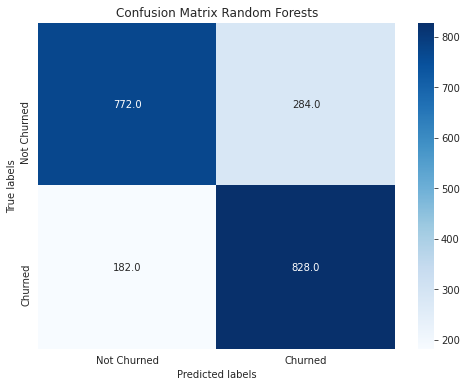

In [ ]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_rfc,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Random Forests');

####Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.81      0.73      0.77      1056
           1       0.74      0.82      0.78      1010

    accuracy                           0.77      2066
   macro avg       0.78      0.78      0.77      2066
weighted avg       0.78      0.77      0.77      2066



####Gradient Boosting Model

In [ ]:
param_grid = {'learning_rate': [0.1],
          'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450, 500],
          'max_depth': [2,4,6,8,10],
          'loss': ['deviance', 'exponential']}

In [ ]:
from sklearn import ensemble
gbm=ensemble.GradientBoostingClassifier(random_state=40)

gbm = GridSearchCV(estimator=gbm, param_grid=param_grid, cv= 5)
gbm.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_c...
                 

In [ ]:
gbm.best_params_

{'learning_rate': 0.1,
 'loss': 'exponential',
 'max_depth': 8,
 'n_estimators': 100}

In [ ]:
#Fitting Gradient Boosting model with best parameters
from sklearn import ensemble
gbm_best=ensemble.GradientBoostingClassifier(random_state=40, learning_rate=0.1, n_estimators= 100, max_depth=8, loss='exponential')
%timeit gbm_best.fit(X_train, y_train)
%timeit print(gbm_best.score(X_train,y_train))

1 loop, best of 3: 2.89 s per loop
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
0.8897094430992736
10 loops, best of 3: 31.7 ms per loop


#####Training the Gradient Boosting model took 2.89 seconds on average.

In [ ]:
y_pred_gbm=gbm_best.predict(X_test)

####Confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix_gbm = confusion_matrix(y_test, y_pred_gbm)
print(confusion_matrix_gbm)

[[777 279]
 [206 804]]


#### Confusion matrix (nice plot)

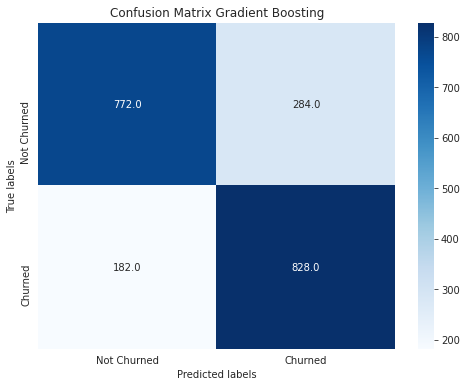

In [ ]:
import seaborn as sns

#plotting a confusion matrix
labels = ['Not Churned', 'Churned']
plt.figure(figsize=(8,6))
ax= plt.subplot()
sns.heatmap(confusion_matrix_rfc,cmap="Blues",annot=True,fmt='.1f', ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix Gradient Boosting');

####Classification Report

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_gbm))

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1056
           1       0.74      0.80      0.77      1010

    accuracy                           0.77      2066
   macro avg       0.77      0.77      0.77      2066
weighted avg       0.77      0.77      0.77      2066



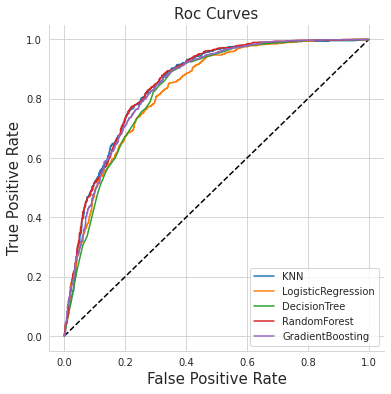

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from seaborn import despine

knn_score = knn.predict_proba(X_test)[:,1]
lr_score = lr.predict_proba(X_test)[:,1]
decision_tree_score = decision_tree.predict_proba(X_test)[:,1]
rfc_score = rfc_best.predict_proba(X_test)[:,1]
gbm_score = gbm_best.predict_proba(X_test)[:,1]

knn_fpr, knn_tpr,_ = roc_curve(y_test, knn_score)
lr_fpr, lr_tpr,_ = roc_curve(y_test, lr_score)
decision_tree_fpr, decision_tree_tpr,_ = roc_curve(y_test, decision_tree_score)
rfc_fpr, rfc_tpr,_ = roc_curve(y_test, rfc_score)
gbm_fpr, gbm_tpr,_ = roc_curve(y_test, gbm_score)

plt.figure(figsize = (6,6))
plt.subplot(1,1,1)
# Plotting our Baseline..
plt.plot([0,1],[0,1], 'k--')

plt.plot(knn_fpr,knn_tpr, label = 'KNN')
plt.plot(lr_fpr,lr_tpr, label = 'LogisticRegression')
plt.plot(decision_tree_fpr, decision_tree_tpr, label = 'DecisionTree')
plt.plot(rfc_fpr,rfc_tpr, label = 'RandomForest')
plt.plot(gbm_fpr,gbm_tpr, label = 'GradientBoosting')

plt.legend()
plt.grid(True)
plt.xlabel('False Positive Rate', fontsize = '15')
plt.ylabel('True Positive Rate', fontsize = '15')
plt.title('Roc Curves', fontsize = '15')
despine()

plt.savefig('RocCurve')

####Based on comparison of ROC curves for all the models (from PCA method), Gradient Boosting and Random Forest again perform better slightly better compared to other models on the test data.

###Conclusions and Results 

####I have carried out Exploratory Data Analysis (EDA) to explore the correlation between several features and the target variable 'Churn'. The initial analysis and visualizations indicated that Month-to-month contracts, No Online Security, No Tech Support, Fiber Optic Internet service and Electronic Check Payment seem to be positively correlated with Churn. While, Tenure, Two Year Contracts, No Internet Service  seem to be negatively correlated with churn. 

####Since my target variable was unbalanced, I balanced with SMOTE (Synthetic Minority Oversampling Technique).With my training data created, I up-sampled minority sample (in our case the 'Yes-Churn') sample using the SMOTE algorithm.

####I have performed detailed Feature Engineering using SelectKbest and PCA methods to choose the best predictors (more important features) for the target variable 'Churn'. Both the methods reduced the numbers of features for the Supervised Learning models.

####Then, I used gridsearchCV to tune and select the best hyperparameters for the following Supervised Learning models: Logistic Regression, KNN, Decision Tree, Random Forest, SVM, and Gradient Boosting classifiers. Note: We dropped SVM model from our analysis since it was not agood fit for this dataset.

####Finally, I performed cross validation, Confusion matrix, Classification reports, and compared ROC curves of all the models. I used some of the following metrics to compare the performance of the models: 1. Accuracy, 2.Precision, 3. Recall, 4. F1 score, etc. 

####The results are as follows using SelectKbest and PCA methods:

####SelectKbest method, 
#####KNN                :Accuracy=0.77,Precision=0.78,Recall=0.78, F1 score=0.77
#####Logistic Regression:Accuracy=0.77,Precision=0.77,Recall=0.77, F1 score=0.76
#####Decision Tree      :Accuracy=0.81,Precision=0.81,Recall=0.81, F1 score=0.81
#####Random Forest      :Accuracy=0.85,Precision=0.85,Recall=0.85, F1 score=0.85
#####Gradient Boosting  :Accuracy=0.85,Precision=0.85,Recall=0.85, F1 score=0.85
####Based on the metrics for all the models, Gradient Boosting and Random Forest performed better compared to other models on the test data. Also compared ROC curves as a sensitivity metric for all the models. Gradient Boosting and Random Forest performed better compared to other models. Note: It took 1.44 secs to train Random Forest model and 1.85 secs to train Gradient Boosting model which are much higher compared to other models such as Logistic Regression 171 millisecs and KNN 21.5 millisecs on average.


####PCA method, 
#####KNN                :Accuracy=0.77,Precision=0.78,Recall=0.77, F1 score=0.77
#####Logistic Regression:Accuracy=0.74,Precision=0.75,Recall=0.74, F1 score=0.74
#####Decision Tree      :Accuracy=0.76,Precision=0.77,Recall=0.76, F1 score=0.76
#####Random Forest      :Accuracy=0.77,Precision=0.78,Recall=0.77, F1 score=0.77
#####Gradient Boosting  :Accuracy=0.77,Precision=0.77,Recall=0.77, F1 score=0.77
####Based on the metrics, all the models performed relatively similar. Also compared ROC curves as a sensitivity metric for all the models. Random Forest and Gradient Boosting performed only slightly better compared to other models on the test data. Note: Again, it took 3.3 secs to train Random Forest model and 2.89 secs to train Gradient Boosting model which are much higher compared to other models such as Logistic Regression 18.9 millisecs and KNN 4.62 millisecs on average. 

###Future Work & Recommendations

####For future work, I can perform some cost evaluations based on our best predictive models and compare cost effects on implementing and not implementing predictive modeling for this project. But we also need to understand the limitations in our data before recommending any actions on churned customers such as looking at biases since we are dealing with a limited dataset (7043 observations and 40 features). 